In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
                                                                                                                                                                                                                                                                        from math import sqrt
import numpy as np
from numpy import concatenate
from pandas import read_excel
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from pandas import read_csv
from datetime import datetime
from keras.layers import Bidirectional
from keras.layers import Dropout
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import time
import os
import seaborn as sn
import copy


In [ ]:

from numpy import array
from sklearn.model_selection import train_test_split

In [ ]:
df = read_excel('/content/drive/MyDrive/2019j.xlsx')

print("Shape of df:",df.shape)
print(df.head(5))

df = df.replace(to_replace='None', value=np.nan)
df = df.dropna(axis = 0, how = 'all')
df['PM10'].fillna(df['PM10'].median(), inplace=True)
df['NO'].fillna(df['NO'].median(), inplace=True)
df['NO2'].fillna(df['NO2'].median(), inplace=True)
df['SO2'].fillna(df['SO2'].median(), inplace=True)
df['PM2.5'].fillna(df['PM2.5'].median(), inplace=True)

print(" \nCount total NaN at each column in a DataFrame : \n\n", df.isnull().sum())

Shape of df: (28818, 7)
          From Date           To Date   PM2.5    PM10     NO    NO2    SO2
0  01-01-2019 00:00  01-01-2019 01:00  120.11  202.65  94.64  28.27   8.96
1  01-01-2019 01:00  01-01-2019 02:00  148.44  331.07  98.09  27.76  11.56
2  01-01-2019 02:00  01-01-2019 03:00  135.22  268.12  62.31  27.76   12.1
3  01-01-2019 03:00  01-01-2019 04:00  101.37  199.95  42.12  29.19   5.52
4  01-01-2019 04:00  01-01-2019 05:00    78.9   160.3  35.67  28.33   4.08
 
Count total NaN at each column in a DataFrame : 

 From Date    0
To Date      0
PM2.5        0
PM10         0
NO           0
NO2          0
SO2          0
dtype: int64


In [ ]:
features = df

In [ ]:
feat = features['PM10'].values
print("PM10 :", "Min = ",min(feat), ", Max = ", max(feat) , ", Mean = ", np.mean(feat), ", Std = ",np.std(feat))
feat = features['NO'].values
print("NO :", "Min = ",min(feat), ", Max = ", max(feat) , ", Mean = ", np.mean(feat), ", Std = ",np.std(feat))
feat = features['NO2'].values
print("NO2 :", "Min = ",min(feat), ", Max = ", max(feat) , ", Mean = ", np.mean(feat), ", Std = ",np.std(feat))
feat = features['SO2'].values
print("SO2 :", "Min = ",min(feat), ", Max = ", max(feat) , ", Mean = ", np.mean(feat), ", Std = ",np.std(feat))
feat = features['PM2.5'].values
print("PM2.5 :", "Min = ",min(feat), ", Max = ", max(feat) , ", Mean = ", np.mean(feat), ", Std = ",np.std(feat))

PM10 : Min =  0.3 , Max =  989.5 , Mean =  158.7722426955375 , Std =  92.52381783528917
NO : Min =  0.01 , Max =  488.7 , Mean =  28.302658754944826 , Std =  47.855493102761784
NO2 : Min =  0.04 , Max =  455.17 , Mean =  29.97345096814491 , Std =  21.252301427183784
SO2 : Min =  0.02 , Max =  171.33 , Mean =  8.870322020959122 , Std =  5.421216487944613
PM2.5 : Min =  0.18 , Max =  999.99 , Mean =  75.42360642653898 , Std =  55.46755386432186


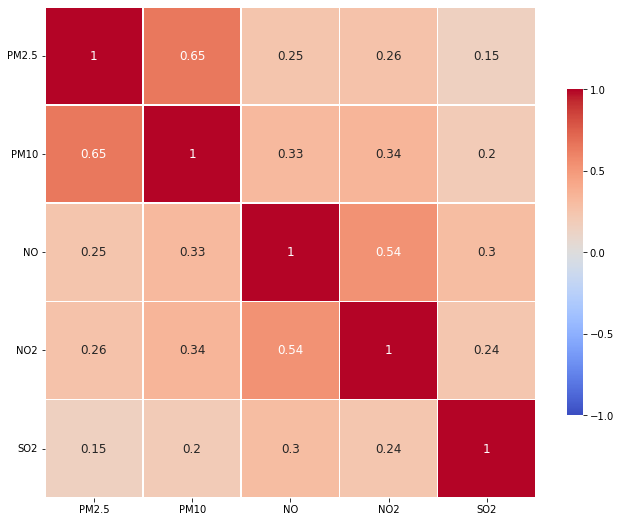

In [ ]:

corr_matrix = features.corr()
f, ax = plt.subplots(figsize=(11, 15))
heatmap = sn.heatmap(corr_matrix,
                      #mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})

#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)

sn.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [ ]:
df['Date'] = pd.to_datetime(df['From Date']) 
df['year'] = df['Date'].dt.year 
df['month'] = df['Date'].dt.month 
df['day'] = df['Date'].dt.day 
df['hour'] = df['Date'].dt.hour 
df['minute'] = df['Date'].dt.minute
df.drop(df.columns[[0, 1]], axis = 1, inplace = True)

In [ ]:
df.head()

,PM2.5,PM10,NO,NO2,SO2,Date,year,month,day,hour,minute
0,120.11,202.65,94.64,28.27,8.96,2019-01-01 00:00:00,2019,1,1,0,0
1,148.44,331.07,98.09,27.76,11.56,2019-01-01 01:00:00,2019,1,1,1,0
2,135.22,268.12,62.31,27.76,12.10,2019-01-01 02:00:00,2019,1,1,2,0
3,101.37,199.95,42.12,29.19,5.52,2019-01-01 03:00:00,2019,1,1,3,0
4,78.90,160.30,35.67,28.33,4.08,2019-01-01 04:00:00,2019,1,1,4,0


In [ ]:
df.describe()

,PM2.5,PM10,NO,NO2,SO2,year,month,day,hour,minute
count,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.0
mean,75.423606,158.772243,28.302659,29.973451,8.870322,2020.174474,6.311888,15.461378,11.498126,0.0
std,55.468516,92.525423,47.856323,21.252670,5.421311,0.962545,3.500895,8.970665,6.921765,0.0
min,0.180000,0.300000,0.010000,0.040000,0.020000,2019.000000,1.000000,1.000000,0.000000,0.0
25%,43.560000,103.600000,8.380000,16.800000,5.700000,2019.000000,3.000000,8.000000,5.000000,0.0
50%,63.790000,138.650000,14.210000,24.740000,7.990000,2020.000000,6.000000,16.000000,11.000000,0.0
75%,91.387500,187.777500,24.890000,36.300000,10.840000,2021.000000,9.000000,23.000000,17.000000,0.0
max,999.990000,989.500000,488.700000,455.170000,171.330000,2022.000000,12.000000,31.000000,23.000000,0.0


In [ ]:
df_train = df[(df["year"] <2021) ]
df_test=df[(df["year"] ==2021)]
df.to_csv('pollution.csv')
df_train.to_csv('train_pollution.csv')
df_test.to_csv('test_pollution.csv')

In [ ]:
df_test.shape

(8760, 11)

In [ ]:
df_train.shape

(17544, 11)

In [ ]:
df_test

,PM2.5,PM10,NO,NO2,SO2,Date,year,month,day,hour,minute
17544,99.27,102.50,9.87,10.59,7.85,2021-01-01 00:00:00,2021,1,1,0,0
17545,84.50,127.05,10.30,8.25,7.08,2021-01-01 01:00:00,2021,1,1,1,0
17546,73.08,127.70,5.37,9.82,9.64,2021-01-01 02:00:00,2021,1,1,2,0
17547,79.49,144.77,6.21,12.00,6.73,2021-01-01 03:00:00,2021,1,1,3,0
17548,65.00,132.45,7.46,20.30,6.72,2021-01-01 04:00:00,2021,1,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...
26299,70.52,196.95,24.30,50.64,8.78,2021-12-31 19:00:00,2021,12,31,19,0
26300,82.05,182.72,24.48,54.11,6.43,2021-12-31 20:00:00,2021,12,31,20,0
26301,117.25,157.48,23.48,56.06,3.33,2021-12-31 21:00:00,2021,12,31,21,0
26302,57.34,129.05,23.73,54.40,7.17,2021-12-31 22:00:00,2021,12,31,22,0


In [ ]:
df_train

,PM2.5,PM10,NO,NO2,SO2,Date,year,month,day,hour,minute
0,120.11,202.65,94.64,28.27,8.96,2019-01-01 00:00:00,2019,1,1,0,0
1,148.44,331.07,98.09,27.76,11.56,2019-01-01 01:00:00,2019,1,1,1,0
2,135.22,268.12,62.31,27.76,12.10,2019-01-01 02:00:00,2019,1,1,2,0
3,101.37,199.95,42.12,29.19,5.52,2019-01-01 03:00:00,2019,1,1,3,0
4,78.90,160.30,35.67,28.33,4.08,2019-01-01 04:00:00,2019,1,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...
17539,61.61,176.00,7.76,39.33,12.86,2020-12-31 19:00:00,2020,12,31,19,0
17540,85.00,177.07,7.32,22.56,8.96,2020-12-31 20:00:00,2020,12,31,20,0
17541,83.25,169.32,7.60,15.13,9.53,2020-12-31 21:00:00,2020,12,31,21,0
17542,76.51,139.50,7.84,16.46,9.57,2020-12-31 22:00:00,2020,12,31,22,0


In [ ]:
# define input sequence
pm2 = df_train['PM2.5'].values
pm10 = df_train['PM10'].values
so2 = df_train['SO2'].values
no2 = df_train['NO2'].values
no = df_train['NO'].values

In [ ]:
pm2test = df_test['PM2.5'].values
pm10test = df_test['PM10'].values
so2test = df_test['SO2'].values
no2test = df_test['NO2'].values
notest = df_test['NO'].values

In [ ]:
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 


In [ ]:
def lstm(df):
    n_steps = 4
    # split into samples
    X, y = split_sequence(df, n_steps)
    # reshape from [samples, timesteps] into [samples, timesteps, features]
    n_features = 1
    X = X.reshape((X.shape[0], X.shape[1], n_features))
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    # fit model
    model.fit(X, y, epochs=200, verbose=0)
    return model

In [ ]:
model_pm2 = lstm(pm2)
model_pm10 = lstm(pm10)
model_so2 = lstm(so2)
model_no2 = lstm(no2)
model_no = lstm(no)

In [ ]:
import pickle
def dump(model,file):
  filehandler = open(file,"wb")
  pickle.dump(model,filehandler)
  filehandler.close()

In [ ]:
dump(model_pm2,"model_pm2")
dump(model_pm10,"model_pm2")
dump(model_so2,"model_pm2")
dump(model_no2,"model_pm2")
dump(model_no,"model_pm2")

INFO:tensorflow:Assets written to: ram://100fb68c-638a-4d1d-97e8-4d773ca0f772/assets


INFO:tensorflow:Assets written to: ram://100fb68c-638a-4d1d-97e8-4d773ca0f772/assets


INFO:tensorflow:Assets written to: ram://c1f25f44-95fc-4ab1-aecb-febfbcffeb44/assets


INFO:tensorflow:Assets written to: ram://c1f25f44-95fc-4ab1-aecb-febfbcffeb44/assets


INFO:tensorflow:Assets written to: ram://70366451-5c69-4a63-b973-90818a392851/assets


INFO:tensorflow:Assets written to: ram://70366451-5c69-4a63-b973-90818a392851/assets


INFO:tensorflow:Assets written to: ram://2a6dbc98-d4ad-4de3-b8f6-2a2f7e646bc3/assets


INFO:tensorflow:Assets written to: ram://2a6dbc98-d4ad-4de3-b8f6-2a2f7e646bc3/assets


INFO:tensorflow:Assets written to: ram://2a25f47e-4f19-4851-bf3e-fa24bb784b3d/assets


INFO:tensorflow:Assets written to: ram://2a25f47e-4f19-4851-bf3e-fa24bb784b3d/assets


In [ ]:
def predict(n,df,model,n_steps,n_features):
  ypred = []
  for i in range(0,n):
    x_input = df[i:i+4]
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    ypred.append(yhat[0][0])
  return ypred

In [ ]:
df_2022 = df[(df["year"] ==2022) ]

In [ ]:
df_2022_pm2 = df_2022['PM2.5'].values
df_2022_pm10 = df_2022['PM10'].values
df_2022_so2 = df_2022['SO2'].values
df_2022_no2 = df_2022['NO2'].values
df_2022_no = df_2022['NO'].values

In [ ]:
df_2022_pm2

array([ 58.41,  58.17, 101.25, ...,  47.14,  44.01,  65.56])

In [ ]:
pred_pm2 = predict(2000,df_2022_pm2,model_pm2,4,1)
pred_pm10 = predict(2000,df_2022_pm10,model_pm10,4,1)
pred_so2 = predict(2000,df_2022_so2,model_so2,4,1)
pred_no2 = predict(2000,df_2022_no2,model_no2,4,1)
pred_no = predict(2000,df_2022_no,model_no,4,1)

In [ ]:
def plot_fig(train,test,pollutant):
  plt.xlabel('time stamps')
  # naming the y axis
  plt.ylabel(pollutant)
  plt.rcParams['figure.figsize'] = [20, 10]
  plt.plot(train[4:2004])
  plt.plot(test)
  plt.title("Actaul vs predicted")
  plt.show()

In [ ]:
def plot_sc(train,test,pollutant):
  plt.rcParams['figure.figsize'] = [20, 10]
  plt.scatter(train[4:2004],test)
  plt.title("Actaul vs predicted")
  plt.show()

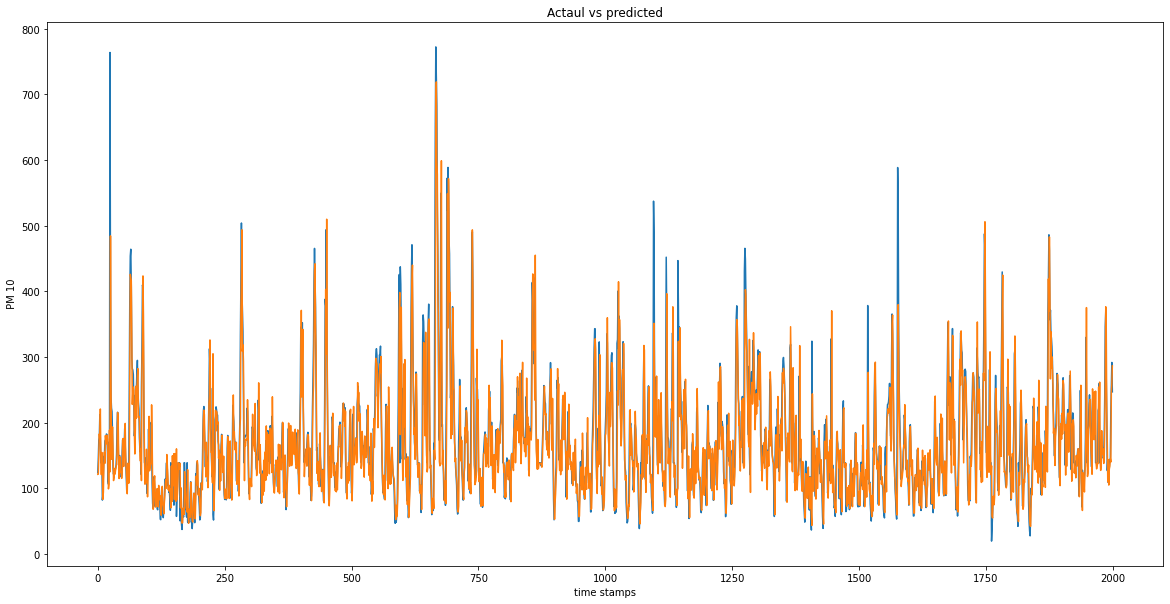

In [ ]:
plot_fig(df_2022_pm10,pred_pm10, " PM 10")

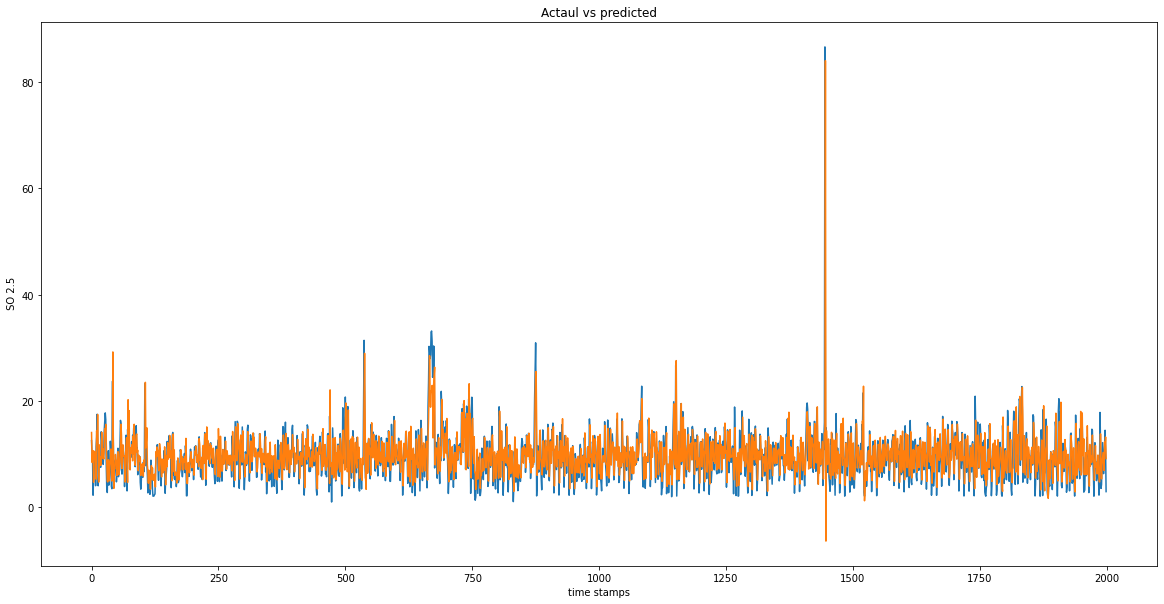

In [ ]:
plot_fig(df_2022_so2,pred_so2, " SO 2.5")

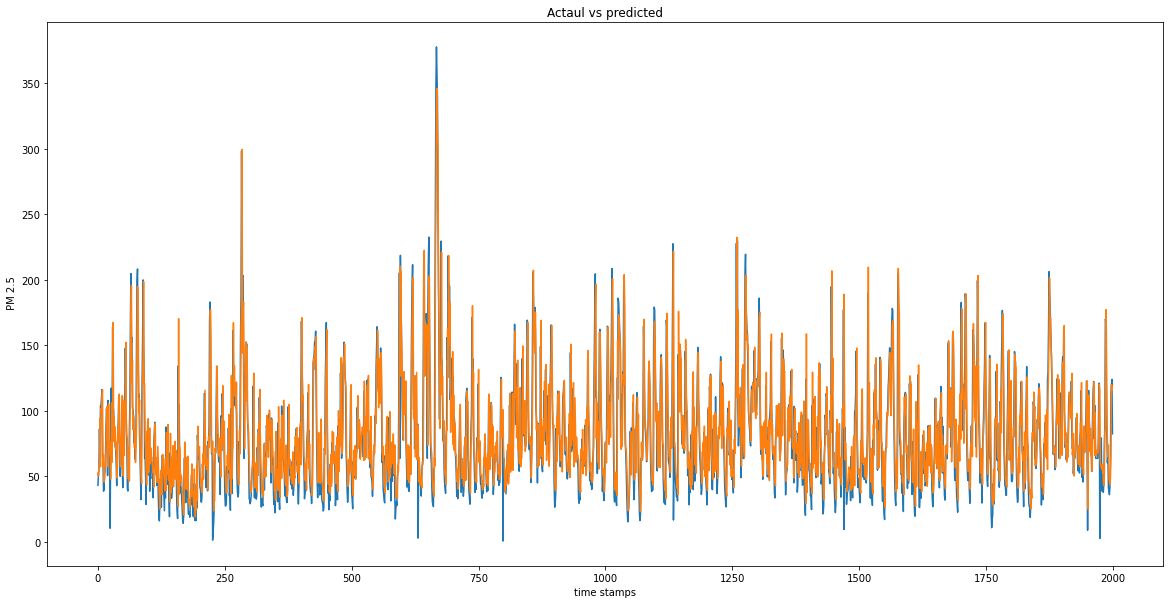

In [ ]:
plot_fig(df_2022_pm2,pred_pm2, " PM 2.5")

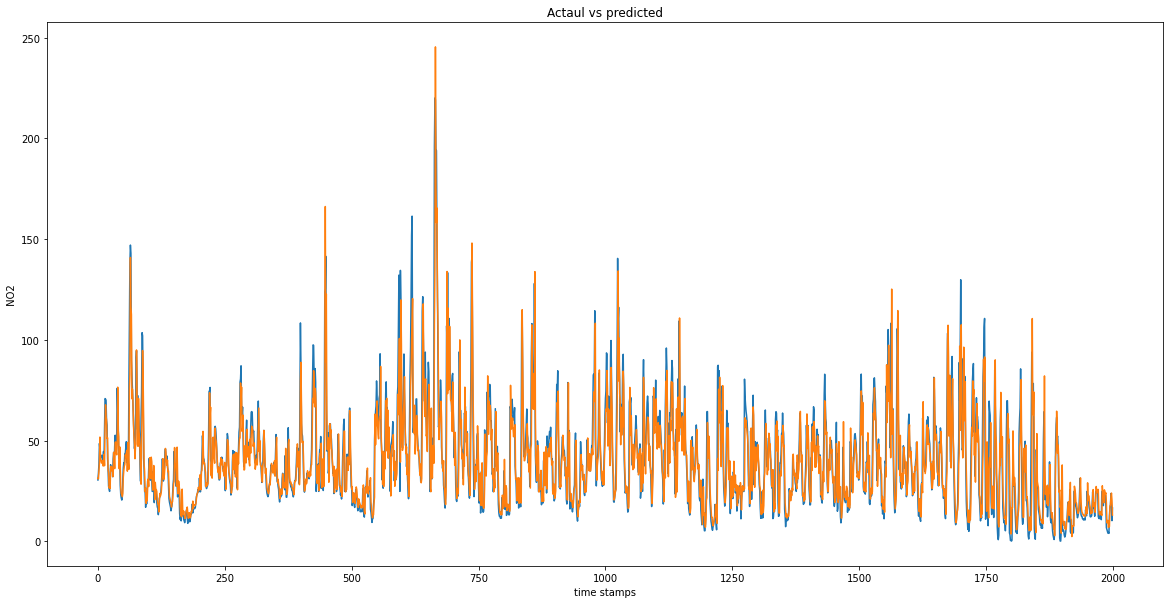

In [ ]:
plot_fig(df_2022_no2,pred_no2, " NO2 ")

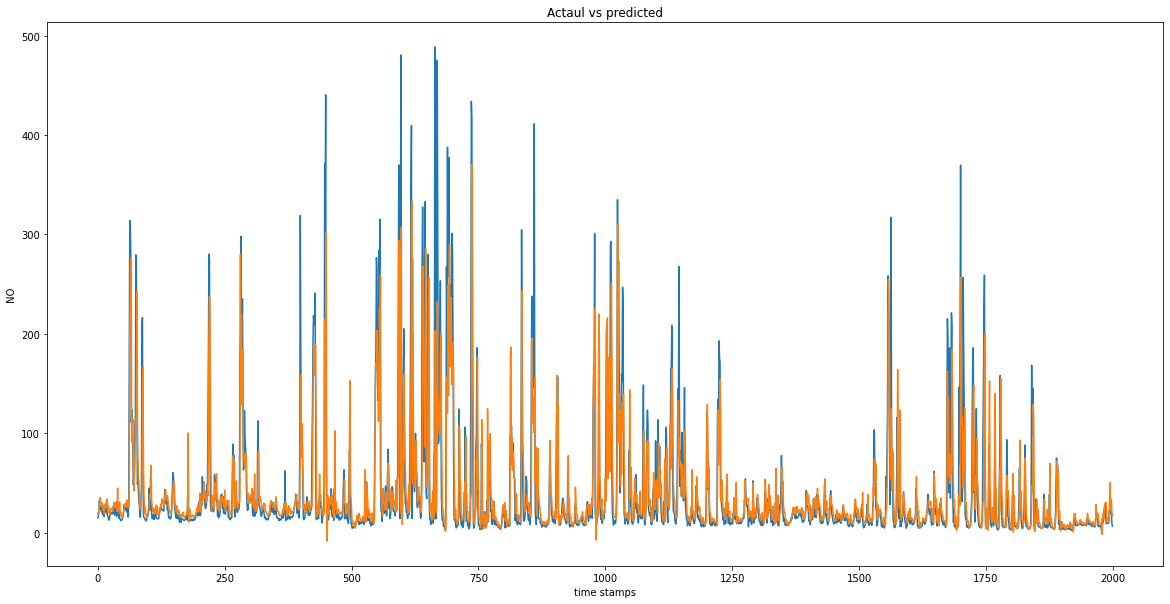

In [ ]:
plot_fig(df_2022_no,pred_no, " NO ")

In [ ]:
df_2022["PM10_24hr_avg"] = df_2022["PM10"].rolling(window = 24, min_periods = 16).mean().values
df_2022["PM2.5_24hr_avg"] = df_2022["PM2.5"].rolling(window = 24, min_periods = 16).mean().values
df_2022["SO2_24hr_avg"] = df_2022["SO2"].rolling(window = 24, min_periods = 16).mean().values
df_2022["NO_24hr_avg"] = df_2022["NO"].rolling(window = 24, min_periods = 16).mean().values
df_2022["NO2_24hr_avg"] = df_2022["NO2"].rolling(window = 24, min_periods = 16).mean().values


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

df_2022["PM2.5_SubIndex"] = df_2022["PM2.5_24hr_avg"].apply(lambda x: get_PM25_subindex(x))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

df_2022["PM10_SubIndex"] = df_2022["PM10_24hr_avg"].apply(lambda x: get_PM10_subindex(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

df_2022["SO2_SubIndex"] = df_2022["SO2_24hr_avg"].apply(lambda x: get_SO2_subindex(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
## NOx Sub-Index calculation
def get_NO_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

df_2022["NO_SubIndex"] = df_2022["NO_24hr_avg"].apply(lambda x: get_NO_subindex(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
def get_NO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

df_2022["NO2_SubIndex"] = df_2022["NO2_24hr_avg"].apply(lambda x: get_NO2_subindex(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
## AQI bucketing
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Satisfactory"
    elif x <= 200:
        return "Moderate"
    elif x <= 300:
        return "Poor"
    elif x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return np.NaN

In [ ]:
df_2022["Checks"] = (df_2022["PM2.5_SubIndex"] > 0).astype(int) + \
                (df_2022["PM10_SubIndex"] > 0).astype(int) + \
                (df_2022["SO2_SubIndex"] > 0).astype(int) + \
                (df_2022["NO_SubIndex"] > 0).astype(int) + \
                (df_2022["NO2_SubIndex"] > 0).astype(int) 

df_2022["AQI_calculated"] = round(df_2022[["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "NO2_SubIndex",
                                 "NO_SubIndex"]].max(axis = 1))
df_2022.loc[df_2022["PM2.5_SubIndex"] + df_2022["PM10_SubIndex"] <= 0, "AQI_calculated"] = np.NaN
df_2022.loc[df_2022.Checks < 3, "AQI_calculated"] = np.NaN

df_2022["AQI_bucket_calculated"] = df_2022["AQI_calculated"].apply(lambda x: get_AQI_bucket(x))
df_2022[~df_2022.AQI_calculated.isna()].head(13)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

,PM2.5,PM10,NO,NO2,SO2,Date,year,month,day,hour,...,NO_24hr_avg,NO2_24hr_avg,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NO_SubIndex,NO2_SubIndex,Checks,AQI_calculated,AQI_bucket_calculated
26319,38.75,123.30,22.53,44.53,17.44,2022-01-01 15:00:00,2022,1,1,15,...,20.096875,38.061875,143.650000,129.903750,11.610156,25.121094,47.577344,5,144.0,Moderate
26320,39.79,148.43,16.23,40.01,12.90,2022-01-01 16:00:00,2022,1,1,16,...,19.869412,38.176471,137.119608,130.043922,11.875735,24.836765,47.720588,5,137.0,Moderate
26321,51.73,146.90,17.21,55.45,3.97,2022-01-01 17:00:00,2022,1,1,17,...,19.721667,39.136111,133.525926,130.111852,11.491667,24.652083,48.920139,5,134.0,Moderate
26322,54.41,172.12,22.33,70.81,5.46,2022-01-01 18:00:00,2022,1,1,18,...,19.858947,40.803158,130.780702,131.057544,11.246053,24.823684,51.003947,5,131.0,Moderate
26323,69.11,173.20,25.61,70.56,8.01,2022-01-01 19:00:00,2022,1,1,19,...,20.146500,42.291000,130.760000,131.944667,11.184375,25.183125,52.863750,5,132.0,Moderate
26324,89.15,174.67,25.00,70.00,9.18,2022-01-01 20:00:00,2022,1,1,20,...,20.377619,43.610476,133.922222,132.793968,11.198214,25.472024,54.513095,5,134.0,Moderate
26325,101.66,182.47,20.30,60.02,7.91,2022-01-01 21:00:00,2022,1,1,21,...,20.374091,44.356364,138.692424,133.802424,11.138636,25.467614,55.445455,5,139.0,Moderate
26326,87.86,181.60,22.69,57.60,7.45,2022-01-01 22:00:00,2022,1,1,22,...,20.474783,44.932174,141.047826,134.697971,11.059239,25.593478,56.165217,5,141.0,Moderate
26327,50.62,157.65,17.33,41.02,14.14,2022-01-01 23:00:00,2022,1,1,23,...,20.343750,44.769167,138.034722,134.853611,11.334896,25.429688,55.961458,5,138.0,Moderate
26328,107.96,110.60,16.29,35.77,12.55,2022-02-01 00:00:00,2022,2,1,0,...,20.420417,44.941250,144.916667,133.839167,11.609896,25.525521,56.176562,5,145.0,Moderate


In [ ]:
df_aqi = df_2022

In [ ]:
df_aqi.drop(df_aqi.columns[[0, 1,2,3,4,6,7,8,9,10,11]], axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_aqi.drop(df_aqi.columns[[0, 1,2,3,4,6,7,8,5]], axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [106]:
df_aqi.drop(df_aqi.columns[[0]], axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [137]:
df_aqi = df_aqi[~df_2022.AQI_calculated.isna()]

In [118]:
dict = {'PM2.5': pred_pm2,'PM10': pred_pm10,'NO2': pred_no2,'SO2': pred_so2,'NO': pred_no}

In [119]:
df_pred = pd.DataFrame(dict)

In [120]:
df_pred

,PM2.5,PM10,NO2,SO2,NO
0,52.529327,121.024521,31.290140,14.005428,19.698996
1,50.263435,121.213531,30.932148,8.383804,19.166002
2,58.149933,153.708115,34.806244,9.948582,21.564890
3,59.572308,182.652283,39.000805,10.584675,26.629683
4,94.475632,171.601929,51.706032,4.640116,35.260597
...,...,...,...,...,...
1995,48.633797,144.887161,17.803280,6.857691,22.213848
1996,66.459053,139.774078,21.863382,12.197849,25.706051
1997,119.831993,245.414093,23.903728,11.376120,33.693958
1998,115.505981,258.729553,20.415117,13.157658,20.775108


In [121]:
df_pred["PM10_24hr_avg"] = df_pred["PM10"].rolling(window = 24, min_periods = 16).mean().values
df_pred["PM2.5_24hr_avg"] = df_pred["PM2.5"].rolling(window = 24, min_periods = 16).mean().values
df_pred["SO2_24hr_avg"] = df_pred["SO2"].rolling(window = 24, min_periods = 16).mean().values
df_pred["NO_24hr_avg"] = df_pred["NO"].rolling(window = 24, min_periods = 16).mean().values
df_pred["NO2_24hr_avg"] = df_pred["NO2"].rolling(window = 24, min_periods = 16).mean().values

In [122]:
df_pred["NO2_SubIndex"] = df_pred["NO2_24hr_avg"].apply(lambda x: get_NO2_subindex(x))
df_pred["SO2_SubIndex"] = df_pred["SO2_24hr_avg"].apply(lambda x: get_NO2_subindex(x))
df_pred["NO_SubIndex"] = df_pred["NO_24hr_avg"].apply(lambda x: get_NO2_subindex(x))
df_pred["PM2.5_SubIndex"] = df_pred["PM2.5_24hr_avg"].apply(lambda x: get_NO2_subindex(x))
df_pred["PM10_SubIndex"] = df_pred["PM10_24hr_avg"].apply(lambda x: get_NO2_subindex(x))

In [127]:
df_pred["Checks"] = (df_pred["PM2.5_SubIndex"] > 0).astype(int) + \
                (df_pred["PM10_SubIndex"] > 0).astype(int) + \
                (df_pred["SO2_SubIndex"] > 0).astype(int) + \
                (df_pred["NO_SubIndex"] > 0).astype(int) + \
                (df_pred["NO2_SubIndex"] > 0).astype(int) 

df_pred["AQI_calculated"] = round(df_pred[["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "NO2_SubIndex", "NO_SubIndex"]].max(axis = 1))
df_pred.loc[df_pred["PM2.5_SubIndex"] + df_pred["PM10_SubIndex"] <= 0, "AQI_calculated"] = np.NaN
df_pred.loc[df_pred.Checks < 3, "AQI_calculated"] = np.NaN

df_pred["AQI_bucket_calculated"] = df_pred["AQI_calculated"].apply(lambda x: get_AQI_bucket(x))
df_pred[~df_pred.AQI_calculated.isna()].head(13)

,PM2.5,PM10,NO2,SO2,NO,PM10_24hr_avg,PM2.5_24hr_avg,SO2_24hr_avg,NO_24hr_avg,NO2_24hr_avg,NO2_SubIndex,SO2_SubIndex,NO_SubIndex,PM2.5_SubIndex,PM10_SubIndex,Checks,AQI_calculated,AQI_bucket_calculated
15,57.690437,180.124405,67.701599,11.683699,28.632559,144.694189,70.907446,10.079986,26.349344,41.725238,52.156547,12.599982,32.936680,88.634308,164.694189,5,165.0,Moderate
16,75.330376,167.047195,61.901917,7.772106,26.171185,146.009071,71.167618,9.944228,26.338864,42.912101,53.640126,12.430285,32.923580,88.959523,166.009071,5,166.0,Moderate
17,92.953163,169.516663,60.220619,9.441864,32.016533,147.315049,72.377927,9.916319,26.654290,43.873686,54.842107,12.395399,33.317862,90.472408,167.315049,5,167.0,Moderate
18,103.302933,180.693756,50.946239,7.872182,33.904953,149.071823,74.005558,9.808733,27.035904,44.245925,55.307407,12.260916,33.794880,92.506948,169.071823,5,169.0,Moderate
19,84.276917,174.439880,51.358807,7.915054,30.134785,150.340226,74.519126,9.714049,27.190848,44.601569,55.751962,12.142561,33.988560,93.148908,170.340226,5,170.0,Moderate
20,57.463898,141.155624,35.404594,14.067804,20.765804,149.902864,73.706973,9.921371,26.884893,44.163618,55.204523,12.401713,33.606117,92.133716,169.902864,5,170.0,Moderate
21,105.673538,98.869125,33.963802,9.175831,26.696859,147.583148,75.159998,9.887482,26.876346,43.699990,54.624988,12.359353,33.595433,93.949998,167.583148,5,168.0,Moderate
22,69.205750,105.337135,26.584963,10.959436,21.290644,145.746365,74.901118,9.934089,26.633490,42.955858,53.694823,12.417611,33.291862,93.626397,165.746365,5,166.0,Moderate
23,76.511566,188.359421,27.151754,9.510809,18.337826,147.521909,74.968220,9.916452,26.287837,42.297354,52.871693,12.395566,32.859796,93.710275,167.521909,5,168.0,Moderate
24,70.546417,124.770790,26.158566,9.002735,18.129570,147.678004,75.718932,9.708007,26.222444,42.083539,52.604423,12.135009,32.778055,94.648665,167.678004,5,168.0,Moderate


In [128]:
df_pred.drop(df_pred.columns[[0, 1,2,3,4,6,7,8,9,10,11]], axis = 1, inplace = True)

In [130]:
df_pred.drop(df_pred.columns[[0, 1,2,3]], axis = 1, inplace = True)

In [135]:
df_pred = df_pred[~df_pred.AQI_calculated.isna()]

In [138]:
aqi_val_pred = df_pred["AQI_calculated"].values

In [139]:
len(aqi_val_pred)

1985

In [140]:
aqi_val = df_aqi["AQI_calculated"].values[4:1989]

In [142]:
len(aqi_val)

1985

In [146]:
aqi_val

array([132., 134., 139., ..., 155., 159., 162.])

In [147]:
aqi_val_pred

array([165., 166., 167., ..., 199., 199., 205.])

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df_aqi["AQI_bucket_calculated"])
y_actual = le.transform(df_aqi["AQI_bucket_calculated"])

le2 = preprocessing.LabelEncoder()
le2.fit(df_pred["AQI_bucket_calculated"])
y_pred = le.transform(df_pred["AQI_bucket_calculated"])

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

data = {'y_Actual':    y_actual,
        'y_Predicted': y_pred
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()